In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

sns.set()
%matplotlib inline

In [2]:
def plot_train_test(results, axis):

    test = results['test_score']
    train = results['train_score']
    test_std = np.sqrt(results['test_score_variance'])
    train_std = np.sqrt(results['train_score_variance'])

    # Repeated experiments.
    x_coords = np.arange(np.size(test))

    axis.plot(
        x_coords, 
        train, 
        color='blue', marker='o', markersize=5, 
        label=f"Training score"
    )
    axis.plot(
        x_coords, 
        test, 
        color='green', linestyle='--', marker='s', 
        label=f"Validation score"
    )
    axis.fill_between(
        x_coords, 
        train - train_std, 
        train + train_std, 
        alpha=0.15, color='blue'
    )
    axis.fill_between(
        x_coords, 
        test - test_std, 
        test + test_std, 
        alpha=0.15, color='green'
    )
    return axis

In [3]:
def print_params(model, estimator_name):
    
    for var_label in list(model.filter(regex=estimator_name).columns):
        var = np.copy(model[f'{var_label}'])
        try:
            var[np.where(np.isnan(var))] = -1
        except:
            pass
        print(var_label.split('__')[1])
        print('-' * 60)
        print(Counter(var))
        print('-' * 60)
        print('\n')

# Session

* FS: MultiSURF
* CLF: XGBoost
* Hparams: Avg. of GS.

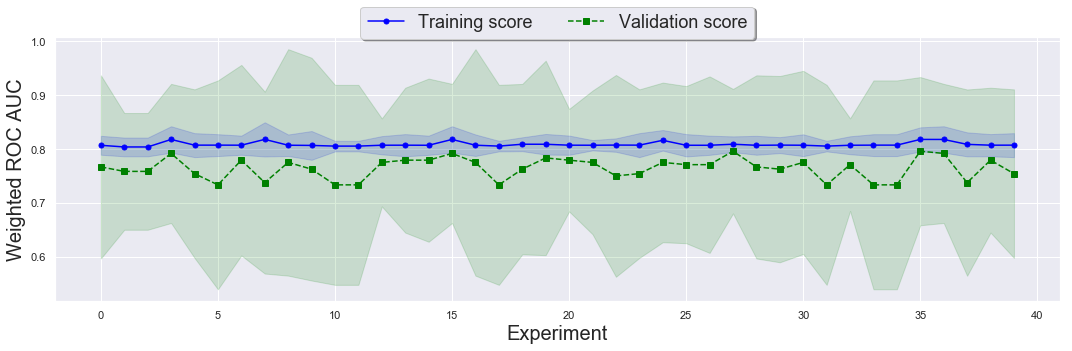

In [4]:
results = pd.read_csv(
    './../../data_source/results/hpv_splitting/ms_xgb_results_all_features_hpv_group_b.csv',
    index_col=0
)
experiment = results[results['experiment_id'] == 'MultiSURFSelection_XGBoost']
fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(experiment, axis)

plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=18,
    title_fontsize=20,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
#plt.savefig(
#    './../../figures/train_valid_curves/ms_xgb_avg_hparams.png',
#    bbox_inches='tight',
#    dpi=100, 
#)
#print(np.mean(experiment['test_score']))

# Session

* FS: None
* CLF: XGBoost
* Hparams: Avg. of GS.

0.7322916666666666


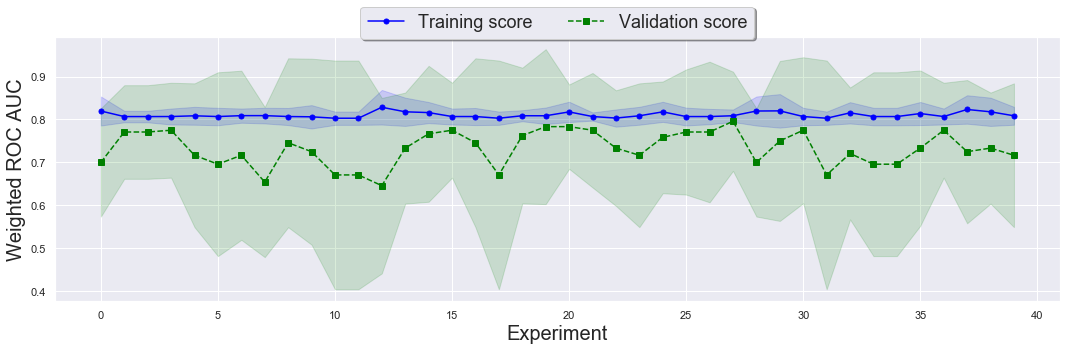

In [43]:
results = pd.read_csv(
    './../../data_source/results/hpv_splitting/ms_xgb_results_all_features_hpv_group_b.csv',
    index_col=0
)
experiment = results[results['experiment_id'] == 'DummySelection_XGBoost']

fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(experiment, axis)

plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=18,
    title_fontsize=20,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../figures/train_valid_curves/xgb_avg_hparams.png',
    bbox_inches='tight',
    dpi=100, 
)
print(np.mean(experiment['test_score']))

# Session

* FS: Biomarkers
* CLF: XGBoost
* Hparams: Avg. of GS.

0.7743750000000003


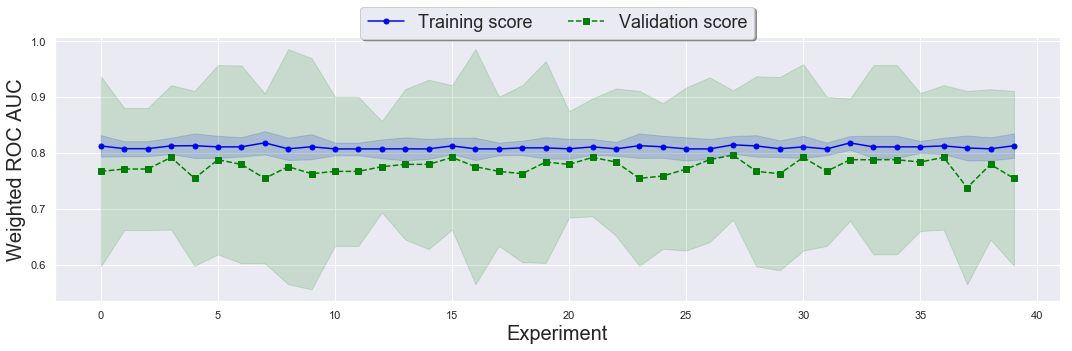

In [44]:
results = pd.read_csv(
    './../../data_source/results/hpv_splitting/xgb_results_all_features_hpv_group_b.csv',
    index_col=0
)
experiment = results[results['experiment_id'] == 'DummySelection_XGBoost']

fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(experiment, axis)

plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=18,
    title_fontsize=20,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../figures/train_valid_curves/biom_xgb_avg_hparams.png',
    bbox_inches='tight',
    dpi=100, 
)
print(np.mean(experiment['test_score']))

# Session

* FS: MultiSURF
* CLF: XGBoost
* Hparams: GS

0.7641666666666664


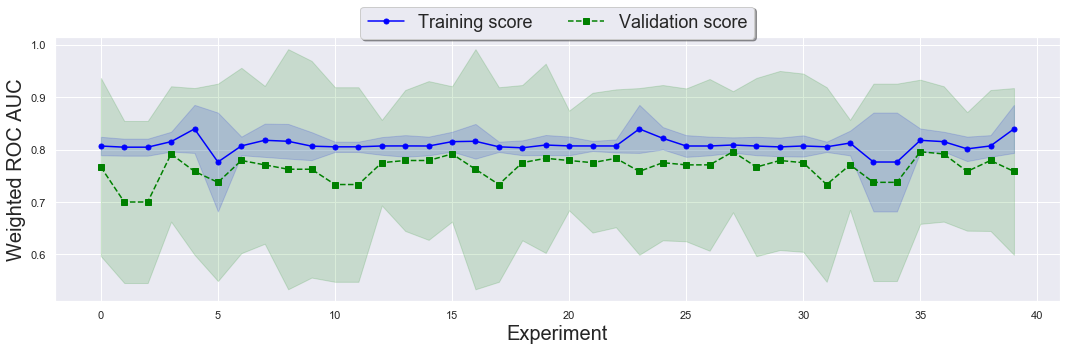

In [45]:
results = pd.read_csv(
    './../../data_source/results/hpv_splitting/results_all_features_hpv_group_b.csv',
    index_col=0
)
experiment = results[results['experiment_id'] == 'MultiSURFSelection_XGBoost']

fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(experiment, axis)

plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=18,
    title_fontsize=20,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../figures/train_valid_curves/ms_xgb_gs.png',
    bbox_inches='tight',
    dpi=100, 
)
print(np.mean(experiment['test_score']))

# Session

* FS: None
* CLF: Ridge
* Hparams: GS.

0.7548958333333332


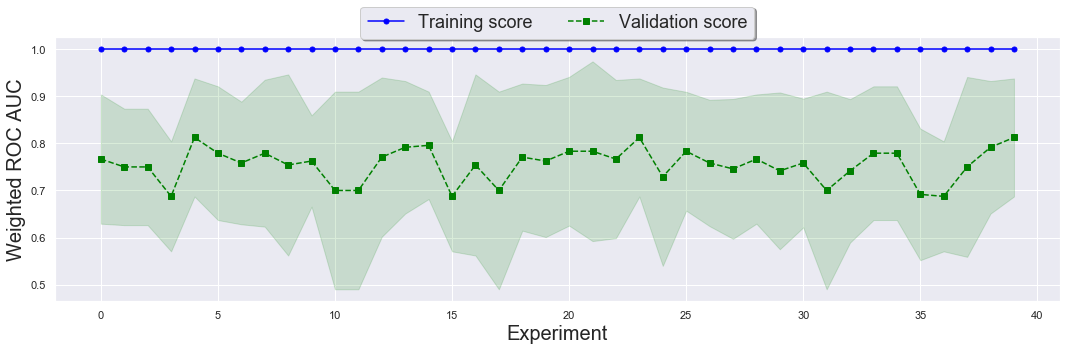

In [6]:
results = pd.read_csv(
    './../../data_source/results/hpv_splitting/results_all_features_original_images_hpv_group_b.csv',
    index_col=0
)
experiment = results[results['experiment_id'] == 'DummySelection_RidgeClassifier']

fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(experiment, axis)

plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=18,
    title_fontsize=20,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
#plt.savefig(
#    './../../figures/train_valid_curves/ridge_gs.png',
#    bbox_inches='tight',
#    dpi=100, 
#)
print(np.mean(experiment['test_score']))